In [5]:
from tensorflow import keras
from tensorflow.keras import layers

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
data = pd.read_csv('./PRSA_data_2010.1.1-2014.12.31.csv')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [11]:
data[data['pm2.5'].isna()]

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43548,43549,2014,12,20,12,NaN,-18,0.0,1030.0,NW,244.97,0,0
43549,43550,2014,12,20,13,NaN,-19,1.0,1029.0,NW,249.89,0,0
43550,43551,2014,12,20,14,NaN,-20,1.0,1029.0,NW,257.04,0,0
43551,43552,2014,12,20,15,NaN,-20,2.0,1028.0,NW,262.85,0,0


In [12]:
data = data.iloc[24:].copy()

In [13]:
data.fillna(method='ffill', inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 24 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43800 non-null  int64  
 1   year    43800 non-null  int64  
 2   month   43800 non-null  int64  
 3   day     43800 non-null  int64  
 4   hour    43800 non-null  int64  
 5   pm2.5   43800 non-null  float64
 6   DEWP    43800 non-null  int64  
 7   TEMP    43800 non-null  float64
 8   PRES    43800 non-null  float64
 9   cbwd    43800 non-null  object 
 10  Iws     43800 non-null  float64
 11  Is      43800 non-null  int64  
 12  Ir      43800 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [9]:
data.drop('No', axis=1, inplace=True)

In [16]:
import datetime

In [17]:
data['time'] = data.apply(lambda x: datetime.datetime(year=x['year'],
                                       month=x['month'],
                                       day=x['day'], 
                                       hour=x['hour']), 
                          axis=1)

In [18]:
data.set_index('time', inplace=True)

In [19]:
data.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)

In [32]:
data.head()

,No,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,NE,NW,SE,cv
time,,,,,,,,,,,,
2010-01-02 00:00:00,25,129.0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0
2010-01-02 01:00:00,26,148.0,-15,-4.0,1020.0,2.68,0,0,0,0,1,0
2010-01-02 02:00:00,27,159.0,-11,-5.0,1021.0,3.57,0,0,0,0,1,0
2010-01-02 03:00:00,28,181.0,-7,-5.0,1022.0,5.36,1,0,0,0,1,0
2010-01-02 04:00:00,29,138.0,-7,-5.0,1022.0,6.25,2,0,0,0,1,0


In [35]:
data.columns = ['pm2.5', 'dew', 'temp', 'press', 'cbwd', 'iws', 'snow', 'rain']

ValueError: Length mismatch: Expected axis has 12 elements, new values have 8 elements

In [34]:
data.cbwd.unique()

AttributeError: 'DataFrame' object has no attribute 'cbwd'

In [23]:
data = data.join(pd.get_dummies(data.cbwd))

In [24]:
del data['cbwd']

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43800 entries, 2010-01-02 00:00:00 to 2014-12-31 23:00:00
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43800 non-null  int64  
 1   pm2.5   43800 non-null  float64
 2   DEWP    43800 non-null  int64  
 3   TEMP    43800 non-null  float64
 4   PRES    43800 non-null  float64
 5   Iws     43800 non-null  float64
 6   Is      43800 non-null  int64  
 7   Ir      43800 non-null  int64  
 8   NE      43800 non-null  uint8  
 9   NW      43800 non-null  uint8  
 10  SE      43800 non-null  uint8  
 11  cv      43800 non-null  uint8  
dtypes: float64(4), int64(4), uint8(4)
memory usage: 4.2 MB


<AxesSubplot:xlabel='time'>

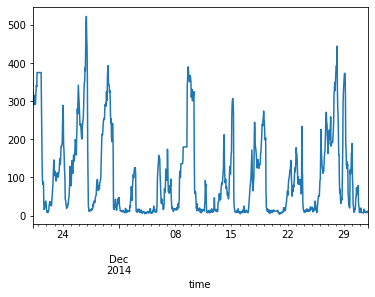

In [28]:
data['pm2.5'][-1000:].plot()

In [30]:
data['temp'][-1000:].plot()

KeyError: 'temp'

In [22]:
data.head(3)

,pm2.5,dew,temp,press,iws,snow,rain,NE,NW,SE,cv
time,,,,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0,0,0,1,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0,0,0,1,0


In [23]:
sequence_length = 5*24
delay = 24

In [31]:
data_ = []
for i in range(len(data) - sequence_length - delay):
    data_.append(data.iloc[i: i + sequence_length + delay])

NameError: name 'sequence_length' is not defined

In [25]:
data_ = np.array([df.values for df in data_])

In [26]:
data_.shape

(43656, 144, 11)

In [27]:
np.random.shuffle(data_)

In [28]:
x = data_[:, :-delay, :]
y = data_[:, -1, 0]

In [36]:
split_boundary = int(data_.shape[0] * 0.8)

AttributeError: 'list' object has no attribute 'shape'

In [30]:
train_x = x[: split_boundary]
test_x = x[split_boundary:]

train_y = y[: split_boundary]
test_y = y[split_boundary:]

In [31]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((34924, 120, 11), (8732, 120, 11), (34924,), (8732,))

In [32]:
mean = train_x.mean(axis=0)
std = train_x.std(axis=0)

In [33]:
mean.shape

(120, 11)

In [34]:
train_x = (train_x - mean)/std

In [35]:
test_x = (test_x - mean)/std

In [36]:
batch_size = 128

In [37]:
model = keras.Sequential()
model.add(layers.Flatten(input_shape=(train_x.shape[1:])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

In [38]:
model.compile(optimizer=keras.optimizers.Adam(), loss='mae')
history = model.fit(train_x, train_y,
                    batch_size = 128,
                    epochs=50,
                    validation_data=(test_x, test_y)
                    )

Train on 34924 samples, validate on 8732 samples
Epoch 1/50
34924/34924 [==============================] - 3s 75us/step - loss: 71.7460 - val_loss: 65.2065
Epoch 2/50
34924/34924 [==============================] - 2s 57us/step - loss: 62.5733 - val_loss: 60.3283
Epoch 3/50
34924/34924 [==============================] - 2s 57us/step - loss: 59.3116 - val_loss: 59.0022
Epoch 4/50
34924/34924 [==============================] - 2s 56us/step - loss: 57.8837 - val_loss: 58.0606
Epoch 5/50
34924/34924 [==============================] - 2s 56us/step - loss: 56.8580 - val_loss: 57.3702
Epoch 6/50
34924/34924 [==============================] - 2s 55us/step - loss: 56.0321 - val_loss: 57.1347
Epoch 7/50
34924/34924 [==============================] - 2s 55us/step - loss: 55.2609 - val_loss: 56.4148
Epoch 8/50
34924/34924 [==============================] - 2s 55us/step - loss: 54.5894 - val_loss: 56.0588
Epoch 9/50
34924/34924 [==============================] - 2s 55us/step - loss: 53.9925 - val_lo

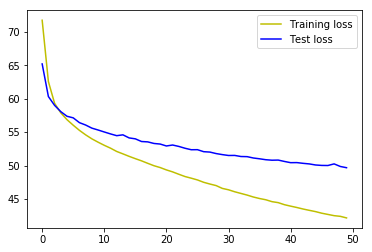

In [39]:
plt.plot(history.epoch, history.history.get('loss'), 'y', label='Training loss')
plt.plot(history.epoch, history.history.get('val_loss'), 'b', label='Test loss')
plt.legend()

In [46]:
model = keras.Sequential()
model.add(layers.LSTM(32, input_shape=(train_x.shape[1:])))
model.add(layers.Dense(1))

In [47]:
model.compile(optimizer=keras.optimizers.Adam(), loss='mae')

In [48]:
history = model.fit(train_x, train_y,
                    batch_size = 128,
                    epochs=200,
                    validation_data=(test_x, test_y))

Train on 34924 samples, validate on 8732 samples
Epoch 1/200
34924/34924 [==============================] - 56s 2ms/step - loss: 88.4082 - val_loss: 82.0198
Epoch 2/200
34924/34924 [==============================] - 56s 2ms/step - loss: 80.1085 - val_loss: 76.9022
Epoch 3/200
34924/34924 [==============================] - 55s 2ms/step - loss: 75.8771 - val_loss: 73.2824
Epoch 4/200
34924/34924 [==============================] - 53s 2ms/step - loss: 72.7580 - val_loss: 70.5160
Epoch 5/200
34924/34924 [==============================] - 53s 2ms/step - loss: 70.4230 - val_loss: 68.4795
Epoch 6/200
34924/34924 [==============================] - 53s 2ms/step - loss: 68.6456 - val_loss: 66.8473
Epoch 7/200
34924/34924 [==============================] - 53s 2ms/step - loss: 66.9879 - val_loss: 65.1626
Epoch 8/200
34924/34924 [==============================] - 53s 2ms/step - loss: 65.4807 - val_loss: 63.8404
Epoch 9/200
34924/34924 [==============================] - 53s 2ms/step - loss: 64.2429

Epoch 76/200
34924/34924 [==============================] - 55s 2ms/step - loss: 51.8363 - val_loss: 50.9280
Epoch 77/200
34924/34924 [==============================] - 54s 2ms/step - loss: 50.8700 - val_loss: 51.3143
Epoch 78/200
34924/34924 [==============================] - 55s 2ms/step - loss: 51.0949 - val_loss: 51.7703
Epoch 79/200
34924/34924 [==============================] - 57s 2ms/step - loss: 51.5899 - val_loss: 51.8728
Epoch 80/200
34924/34924 [==============================] - 55s 2ms/step - loss: 51.3048 - val_loss: 51.4568
Epoch 81/200
34924/34924 [==============================] - 57s 2ms/step - loss: 52.1924 - val_loss: 52.1008
Epoch 82/200
34924/34924 [==============================] - 57s 2ms/step - loss: 51.4649 - val_loss: 52.4641
Epoch 83/200
34924/34924 [==============================] - 54s 2ms/step - loss: 52.0121 - val_loss: 51.6527
Epoch 84/200
34924/34924 [==============================] - 54s 2ms/step - loss: 53.9491 - val_loss: 52.9618
Epoch 85/200
34924/

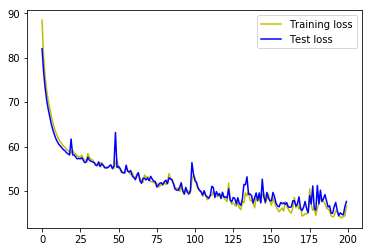

In [49]:
plt.plot(history.epoch, history.history.get('loss'), 'y', label='Training loss')
plt.plot(history.epoch, history.history.get('val_loss'), 'b', label='Test loss')
plt.legend()

In [68]:
model = keras.Sequential()
model.add(layers.LSTM(32, input_shape=(train_x.shape[1:]), return_sequences=True))
model.add(layers.LSTM(32, return_sequences=True))
model.add(layers.LSTM(32))
model.add(layers.Dense(1))

In [69]:
model.compile(optimizer=keras.optimizers.Adam(), loss='mae')

In [70]:
learning_rate_reduction = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=0.00001)

In [71]:
history = model.fit(train_x, train_y,
                    batch_size = 128,
                    epochs=200,
                    validation_data=(test_x, test_y),
                    callbacks=[learning_rate_reduction])

Train on 34924 samples, validate on 8732 samples
Epoch 1/200
34924/34924 [==============================] - 163s 5ms/step - loss: 87.8405 - val_loss: 82.4943
Epoch 2/200
34924/34924 [==============================] - 161s 5ms/step - loss: 80.6917 - val_loss: 77.5596
Epoch 3/200
34924/34924 [==============================] - 158s 5ms/step - loss: 76.5511 - val_loss: 73.9945
Epoch 4/200
34924/34924 [==============================] - 157s 5ms/step - loss: 73.4437 - val_loss: 71.2060
Epoch 5/200
34924/34924 [==============================] - 157s 5ms/step - loss: 71.0459 - val_loss: 69.0802
Epoch 6/200
34924/34924 [==============================] - 157s 5ms/step - loss: 69.2386 - val_loss: 67.5249
Epoch 7/200
34924/34924 [==============================] - 157s 4ms/step - loss: 67.9378 - val_loss: 66.4430
Epoch 8/200
34924/34924 [==============================] - 158s 5ms/step - loss: 67.0219 - val_loss: 65.6854
Epoch 9/200
34924/34924 [==============================] - 157s 5ms/step - loss

34924/34924 [==============================] - 156s 4ms/step - loss: 29.2146 - val_loss: 30.7731
Epoch 76/200
34924/34924 [==============================] - 156s 4ms/step - loss: 28.8769 - val_loss: 30.5097
Epoch 77/200
34924/34924 [==============================] - 158s 5ms/step - loss: 28.8874 - val_loss: 30.6552
Epoch 78/200
34924/34924 [==============================] - 156s 4ms/step - loss: 28.7219 - val_loss: 30.4542
Epoch 79/200
34924/34924 [==============================] - 156s 4ms/step - loss: 28.5923 - val_loss: 30.4131
Epoch 80/200
34924/34924 [==============================] - 156s 4ms/step - loss: 28.5602 - val_loss: 30.1668
Epoch 81/200
34924/34924 [==============================] - 157s 4ms/step - loss: 28.4362 - val_loss: 29.9731
Epoch 82/200
34924/34924 [==============================] - 156s 4ms/step - loss: 28.4768 - val_loss: 30.1384
Epoch 83/200
34924/34924 [==============================] - 157s 4ms/step - loss: 28.0526 - val_loss: 30.0570
Epoch 84/200
34924/3492

KeyboardInterrupt: 